# Exporting data to NetCDF files <img align="right" src="../Supplementary_data/dea_logo.jpg">

* [**Sign up to the DEA Sandbox**](https://docs.dea.ga.gov.au/setup/Sandbox/sandbox.html) to run this notebook interactively from a browser
* **Compatibility:** Notebook currently compatible with both the `NCI` and `DEA Sandbox` environments
* **Products used:** 
[ga_ls8c_nbart_gm_cyear_3](https://explorer.dea.ga.gov.au/ga_ls8c_nbart_gm_cyear_3)

## Background
NetCDF is a file format for storing multidimensional scientific data. 
This file format supports datasets containing multiple observation dates, as well as multiple bands. 
It is a native format for storing the `xarray` datasets that are produced by Open Data Cube, i.e. by `dc.load` commands. 

NetCDF files should follow [Climate and Forecast (CF) metadata conventions](http://cfconventions.org/) for the description of Earth sciences data.
By providing metadata such as geospatial coordinates and sensor information in the same file as the data, CF conventions allow NetCDF files to be "self-describing".
This makes CF-compliant NetCDFs a useful way to save multidimensional data loaded from Digital Earth Australia, as the data can later be loaded with all the information required for further analysis.

The `xarray` library which underlies the Open Data Cube (and hence Digital Earth Australia) was specifically designed for representing NetCDF files in Python. 
However, some geospatial metadata is represented quite differently between the NetCDF-CF conventions versus the GDAL (or proj4) model that is common to most geospatial software (including ODC, e.g. for reprojecting raster data when necessary). 
The main difference between `to_netcdf` (in `xarray` natively) and `write_dataset_to_netcdf` (provided by `datacube`) is that the latter is able to appropriately serialise the *coordinate reference system* object which is associated to the dataset.

## Description
In this notebook we will load some data from Digital Earth Australia and then write it to a (CF-compliant) NetCDF file using the `write_dataset_to_netcdf` function provided by `datacube`. 
We will then verify the file was saved correctly, and (optionally) clean up.

---

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages

In [1]:
%matplotlib inline

import datacube
import xarray as xr
from datacube.drivers.netcdf import write_dataset_to_netcdf

### Connect to the datacube

In [2]:
dc = datacube.Datacube(app='Exporting_NetCDFs')

## Load data from the datacube
Here we load a sample dataset from the DEA Landsat-8 Annual Geomedian product (`ga_ls8c_nbart_gm_cyear_3`).
The loaded data is multidimensional, and contains two time-steps (2015, 2016) and six satellite bands (`blue`, `green`, `red`, `nir`, `swir1`, `swir2`).

In [3]:
lat, lon = -35.282052, 149.128667  # City Hill, Canberra
buffer = 0.01  # Approx. 1km

# Load data from the datacube
ds = dc.load(product='ga_ls8c_nbart_gm_cyear_3',
             lat=(lat - buffer, lat + buffer),
             lon=(lon - buffer, lon + buffer),
             time=('2015', '2016'))

# Print output data
ds

<xarray.Dataset>
Dimensions:      (time: 2, y: 82, x: 71)
Coordinates:
  * time         (time) datetime64[ns] 2015-07-02T11:59:59.999999 2016-07-01T...
  * y            (y) float64 -3.956e+06 -3.956e+06 ... -3.959e+06 -3.959e+06
  * x            (x) float64 1.549e+06 1.549e+06 ... 1.551e+06 1.551e+06
    spatial_ref  int32 3577
Data variables:
    blue         (time, y, x) int16 643 664 726 686 668 ... 478 504 541 513 417
    green        (time, y, x) int16 833 849 985 944 916 ... 692 749 771 753 628
    red          (time, y, x) int16 907 1008 1209 1159 1041 ... 796 813 760 608
    nir          (time, y, x) int16 1938 2017 2132 2339 ... 2754 2635 2726 2634
    swir1        (time, y, x) int16 1817 2068 2356 2386 ... 2012 1909 1932 1731
    swir2        (time, y, x) int16 1442 1653 1994 1919 ... 1221 1210 1170 1006
    sdev         (time, y, x) float32 0.001253 0.0009447 ... 0.009323 0.007298
    edev         (time, y, x) float32 448.9 406.1 578.8 ... 455.3 528.9 504.8
    bcdev        (time, y, x) float32 0.06133 0.05225 0.06478 ... 0.0782 0.07418
    count        (time, y, x) int16 23 25 25 26 26 25 25 ... 24 24 24 24 23 22
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

## Export to a NetCDF file
To export a CF-compliant NetCDF file, we use the `write_dataset_to_netcdf` function:

In [4]:
write_dataset_to_netcdf(ds, 'output_netcdf.nc')

That's all.
The file has now been produced, and stored in the current working directory.

## Reading back from saved NetCDF

Let's start just by confirming the file now exists.
We can use the special `!` command to run command line tools directly within a Jupyter notebook. 
In the example below, `! ls *.nc` runs the `ls` shell command, which will give us a list of any files in the NetCDF file format (i.e. with file names ending with `.nc`).

> For an introduction to using shell commands in Jupyter, [see the guide here](https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html).

In [5]:
! ls *.nc

output_netcdf.nc


We could inspect this file using external utilities such as `gdalinfo` or `ncdump`, or open it for visualisation e.g. in `QGIS`.

We can also load the file back into Python using `xarray`:

In [6]:
# Load the NetCDF from file
reloaded_ds = xr.open_dataset('output_netcdf.nc')

# Print loaded data
reloaded_ds

<xarray.Dataset>
Dimensions:      (time: 2, y: 82, x: 71)
Coordinates:
  * time         (time) datetime64[ns] 2015-07-02T11:59:59 2016-07-01T23:59:59
  * y            (y) float64 -3.956e+06 -3.956e+06 ... -3.959e+06 -3.959e+06
  * x            (x) float64 1.549e+06 1.549e+06 ... 1.551e+06 1.551e+06
    spatial_ref  int32 ...
Data variables:
    blue         (time, y, x) float32 ...
    green        (time, y, x) float32 ...
    red          (time, y, x) float32 ...
    nir          (time, y, x) float32 ...
    swir1        (time, y, x) float32 ...
    swir2        (time, y, x) float32 ...
    sdev         (time, y, x) float32 ...
    edev         (time, y, x) float32 ...
    bcdev        (time, y, x) float32 ...
    count        (time, y, x) float32 ...
Attributes:
    date_created:           2022-05-20T02:42:05.411093
    Conventions:            CF-1.6, ACDD-1.3
    history:                NetCDF-CF file created by datacube version '1.8.6...
    geospatial_bounds:      POLYGON ((149.1151683092923 -35.27228516311249, 1...
    geospatial_bounds_crs:  EPSG:4326
    geospatial_lat_min:     -35.294214594725965
    geospatial_lat_max:     -35.26972444643647
    geospatial_lat_units:   degrees_north
    geospatial_lon_min:     149.1151683092923
    geospatial_lon_max:     149.1420410094036
    geospatial_lon_units:   degrees_east

We can now use this reloaded dataset just like the original dataset, for example by plotting one of its colour bands:

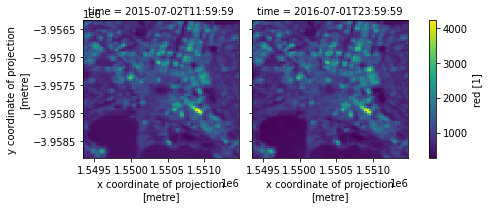

In [7]:
reloaded_ds.red.plot(col='time')

### Clean-up
To remove the saved NetCDF file that we created, run the cell below. This is optional.

In [8]:
! rm output_netcdf.nc

---

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** December 2023

**Compatible datacube version:** 

In [9]:
print(datacube.__version__)

1.8.6


## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)